<a href="https://colab.research.google.com/github/SureshGandham18/Basic-ML/blob/main/Vedic_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of IPL Matches**

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. There have been 12 seasons of the IPL tournaments till now ,But we have data for 10 seasons
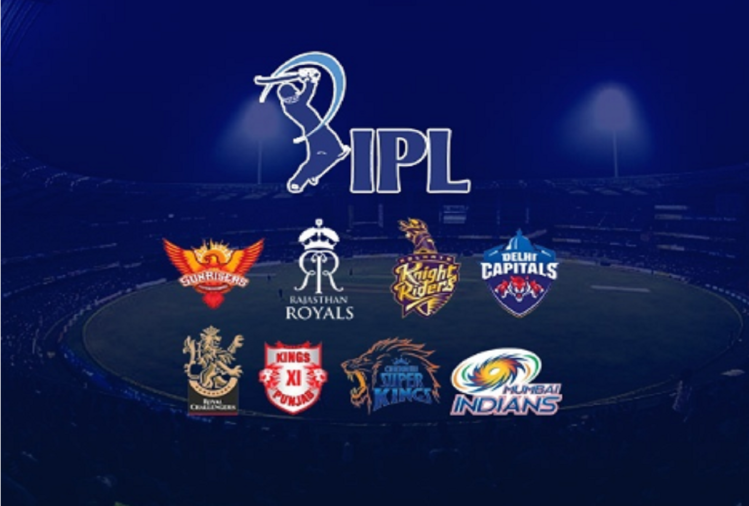

*IPL (Indian Premier League) is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.*

## **Importing libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

##**Get basic information of the data**

Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset – rows and columns – that’s what we find out with the method shape.

In [ ]:
matches = pd.read_csv('matches.csv')

In [ ]:
matches.shape

(756, 18)

And then, It’s important to know the different types of data/variables in the given dataset.

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

The dataset has **18 columns**. Let’s get acquainted with the columns.



* **id:** The IPL match id.
*  **season:** The IPL season
* **city:** The city where the IPL match was held.
*  **date:** The date on which the match was held.
***team1:** One of the teams of the IPL match
***team2:** The other team of the IPL match
***toss_winner:** The team that won the toss
***toss_decision:** The decision taken by the team that won the toss to ‘bat’ or ‘field’
***result:** The result(‘normal’, ‘tie’, ‘no result’) of the match.
***dl_applied:** (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
***winner:** The winner of the match.
***win_by_runs:** Provides the runs by which the team batting first won
***win_by_runs:** Provides the number of wickets by which the team batting second won.
***player_of_match:** The outstanding player of the match.
***venue:** The venue where the match was hosted.
***umpire1:** One of the two on-field umpires who officiate the match.
***umpire2:** One of the two on-field umpires who officiate the match.
***umpire3**: The off-field umpire who officiates the match





Let’s perform a simple summary statistics using the method describe.

In [ ]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


**Observations :**

* The .csv file has data of IPL matches starting from the season 2008 to 2019.
* The biggest victory for the first batting team (win_by_runs) is by 146 runs.
* The biggest victory for the second batting team (win_by_wickets) is by 10 wickets.
* There were 756 IPL matches hosted from 2008 to 2019.

And the final level of this basic information retrieval is to see a couple of actual rows of the input dataset.

In [ ]:
matches.head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


It’s imperative to know the count of Null values for each column before we proceed further.

In [ ]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

The column ‘umpire3’ has a significant number of Null values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Null values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [ ]:
matches.drop('umpire3',axis=1,inplace=True)

Also we will delete date column as we dont need it.

In [ ]:
matches.drop('date',axis=1,inplace=True)

Now we will find the missing data in % over each columns.

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(matches)

,Total,Percent
city,7,0.925926
player_of_match,4,0.529101
winner,4,0.529101
umpire2,2,0.264550
umpire1,2,0.264550
venue,0,0.000000
win_by_wickets,0,0.000000
win_by_runs,0,0.000000
dl_applied,0,0.000000
result,0,0.000000


In [ ]:
matches['city'].mode()

0    Mumbai
dtype: object

Replacing missing city with mumbai

In [ ]:
matches['city'].fillna('Mumbai',inplace=True)

In [ ]:
matches['city'].value_counts()

Mumbai            108
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

Bangalore and Bengaluru are same , so replacing it with Bangalore

In [ ]:
matches.replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
matches['city'].value_counts()

Mumbai            108
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
matches['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

 Here Rising Pune Supergiant and Rising Pune Supergiants are there so replacing it with Rising Pune Supergiants

In [ ]:
matches.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)
matches.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

## Exploratory Analysis and Visualization

Now lets Visualsize the dataset and begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **The most successful IPL Team**
The most successful IPL team is the team that has won most number of times. Here we’ve to count the number of instances in each winning team.

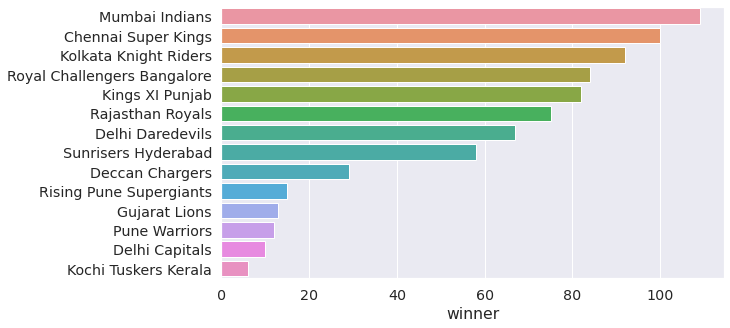

In [ ]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

### **Which season had most number of matches?**
We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.

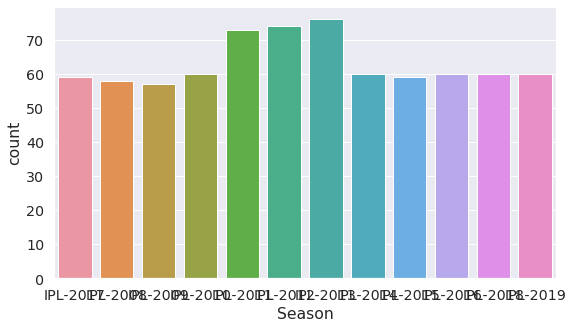

In [ ]:
sns.countplot(x='Season', data=matches)
plt.show()

## The cities where the IPL matches has been played

In [ ]:
most_Ipl_Held = matches['city'].value_counts().reset_index()
most_Ipl_Held.columns = ['city', 'matchcount']
most_Ipl_Held

,city,matchcount
0,Mumbai,108
1,Bangalore,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


## The team which had won by maximum runs

In [ ]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

From the above observation , we can say that the team  Mumbai Indians had won by maximum runs i.e., 146 runs.

## Number of matches has been played in each season.

In [ ]:
seasonMatches = matches.groupby(['Season'])['id'].count().reset_index()
seasonMatches.columns=['Season','Total Matches Played']
seasonMatches


,Season,Total Matches Played
0,IPL-2008,58
1,IPL-2009,57
2,IPL-2010,60
3,IPL-2011,73
4,IPL-2012,74
5,IPL-2013,76
6,IPL-2014,60
7,IPL-2015,59
8,IPL-2016,60
9,IPL-2017,59


## Number of matches were played in each venue.

In [ ]:
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches


,no_of_matches
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


* Eden Gardens Stadium has hosted most matches (77).
* M Chinnaswamy Stadium Stadium is the 4th on the list and hosted 73 matches.
* There were some matches played outside India as well, like in cities Kingsmead, St George’s Park, etc.

## The winner list of the each season.

In [ ]:
season_winner = matches.drop_duplicates(subset=['Season'], keep='last')[['Season', 'winner']]
season_winner.sort_values(by="Season").reset_index(drop=True)

,Season,winner
0,IPL-2008,Rajasthan Royals
1,IPL-2009,Deccan Chargers
2,IPL-2010,Chennai Super Kings
3,IPL-2011,Chennai Super Kings
4,IPL-2012,Kolkata Knight Riders
5,IPL-2013,Mumbai Indians
6,IPL-2014,Kolkata Knight Riders
7,IPL-2015,Mumbai Indians
8,IPL-2016,Sunrisers Hyderabad
9,IPL-2017,Mumbai Indians


## The below graph describes about the Toss-winning helped in winning matches

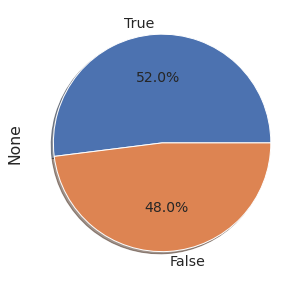

In [ ]:
wins = matches["toss_winner"] == matches["winner"]
ax = wins.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True)

This piechart shows that winning toss actually helped to win the match as well by 51.3%

## Inferences and Conclusion

We analysed on IPL Data set between 2008 to 2019


* In MUMBAI 108 matches held till 2019, followed by Banglore with 80 matches
*  Finally , we can say that the team  Mumbai Indians had won by maximum runs (146 runs).
* Eden Gardens Stadium has hosted the more number of matches(77).
* From the above observations , winning toss actually helped to win the match as well by 51.3%